# Rainfall Prediction Using Austin Weather Data

This notebook predicts precipitation levels using various weather attributes and analyzes their relationships using Python's machine learning and visualization tools.


In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from datetime import datetime
%matplotlib inline

## Load and Inspect Data
Read the Austin weather dataset and inspect its structure and first few rows.

In [24]:
data = pd.read_csv('C:\\Tutedude_DS_Course\\Assignments\\Data\\austin_weather.csv')
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [25]:
print('Shape:', data.shape)
data.info()

Shape: (1319, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         13

## Data Cleaning
Remove irrelevant columns and handle symbolic values like 'T' and '-' for missing or trace precipitation.
Convert all data to numeric where needed.

In [26]:
# Remove irrelevant columns: Date and Events
weather = data.drop(['Date','Events'], axis=1)

# Replace 'T' (trace) in PrecipitationSumInches with 0.0, and '-' elsewhere (missing) with np.nan
weather = weather.replace('T', 0.0)
weather = weather.replace('-', np.nan)

# Convert all other columns to float
for col in weather.columns:
    weather[col] = pd.to_numeric(weather[col], errors='coerce')

# After conversion, check for missing values
weather.isnull().sum()

TempHighF                      0
TempAvgF                       0
TempLowF                       0
DewPointHighF                  7
DewPointAvgF                   7
DewPointLowF                   7
HumidityHighPercent            2
HumidityAvgPercent             2
HumidityLowPercent             2
SeaLevelPressureHighInches     3
SeaLevelPressureAvgInches      3
SeaLevelPressureLowInches      3
VisibilityHighMiles           12
VisibilityAvgMiles            12
VisibilityLowMiles            12
WindHighMPH                    2
WindAvgMPH                     2
WindGustMPH                    4
PrecipitationSumInches         0
dtype: int64

In [27]:
# Drop rows with missing values for simplicity (can also fillna or use imputers)
weather_clean = weather.dropna()
print('Clean shape:', weather_clean.shape)
weather_clean.head()

Clean shape: (1305, 19)


,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,0.00


## Feature Selection & Data Prep
Select weather parameters as features and precipitation as label for prediction.

In [28]:
# Set up features (exclude target column)
features = weather_clean.drop('PrecipitationSumInches', axis=1)
target = weather_clean['PrecipitationSumInches']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Linear Regression Model
Train a Linear Regression model to predict precipitation levels.

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Mean Squared Error: 0.0699
R^2 Score: 0.2211


## Precipitation Trend Visualization
Plot precipitation levels over time using Matplotlib.

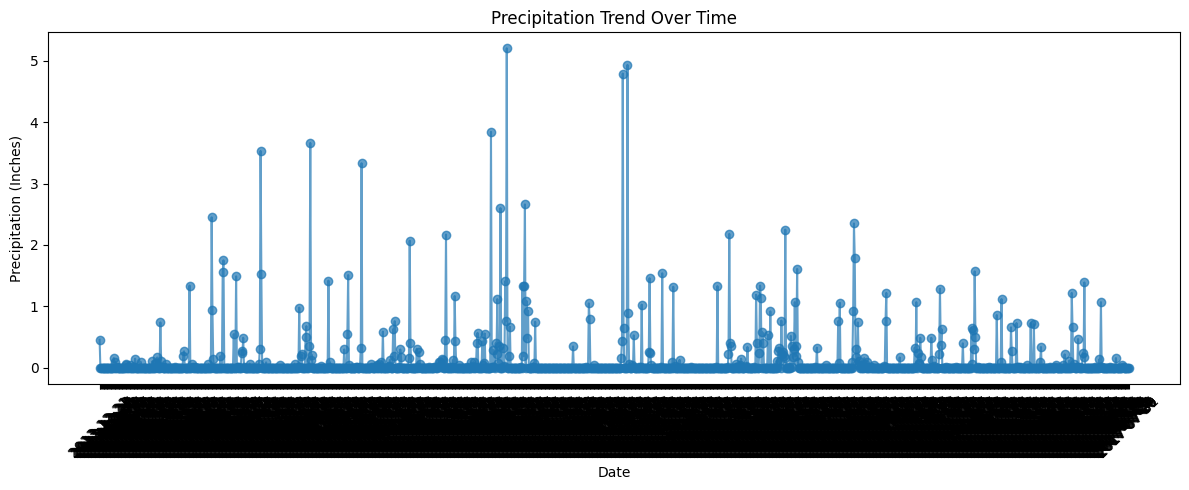

In [30]:
# Use original Date column from uncleaned data for time plots
date_series = data.loc[weather_clean.index, 'Date']
plt.figure(figsize=(12,5))
plt.plot(date_series, weather_clean['PrecipitationSumInches'], marker='o', linestyle='-', alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.title('Precipitation Trend Over Time')
plt.tight_layout()
plt.show()

## Correlation and Relationship Analysis
Visualize relationships between precipitation and selected weather attributes.

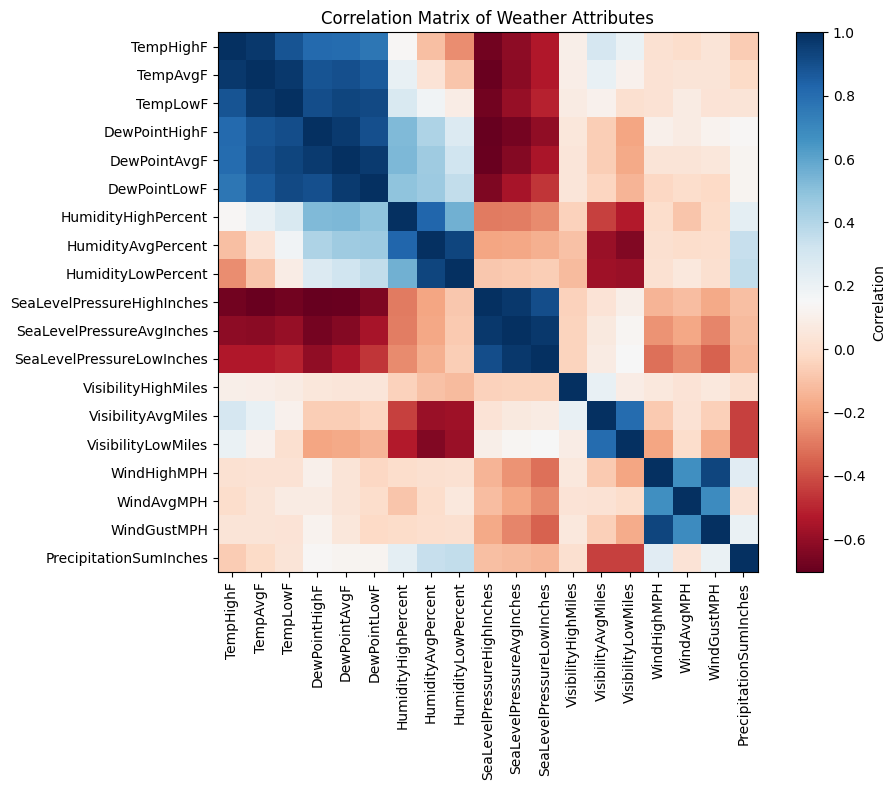

In [31]:
# Analyze correlation matrix
corr = weather_clean.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='RdBu', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix of Weather Attributes')
plt.tight_layout()
plt.show()

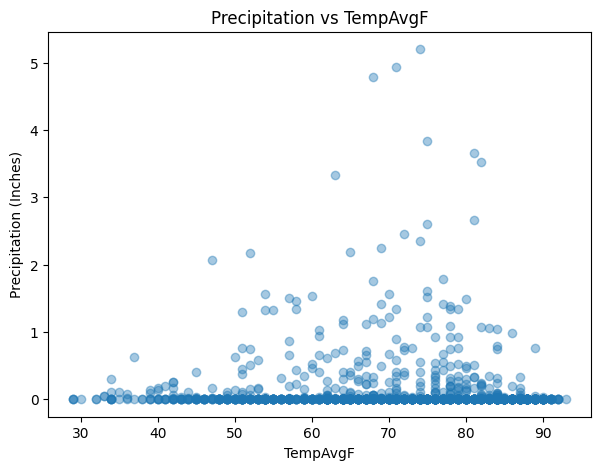

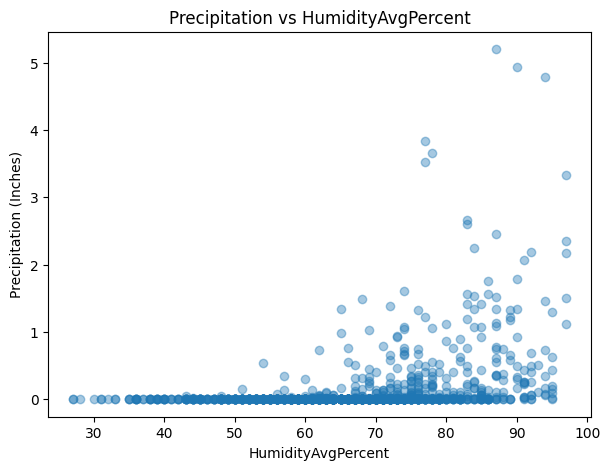

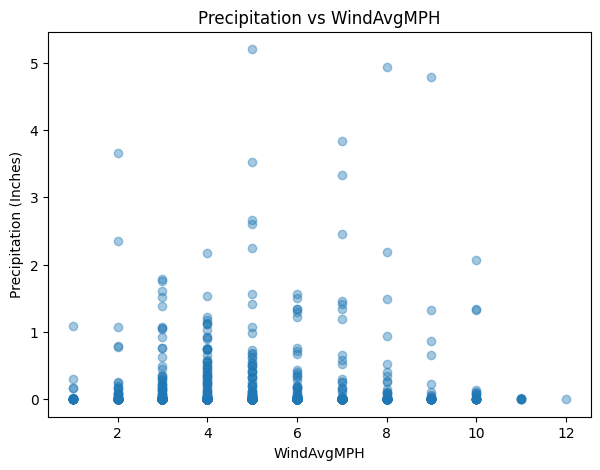

In [32]:
# Scatter plots for main relationships
for attr in ['TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']:
    plt.figure(figsize=(7,5))
    plt.scatter(weather_clean[attr], weather_clean['PrecipitationSumInches'], alpha=0.4)
    plt.xlabel(attr)
    plt.ylabel('Precipitation (Inches)')
    plt.title(f'Precipitation vs {attr}')
    plt.show()